# Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    #df = pd.read_csv(filepath)
    #df = pd.read_csv(filepath, parse_dates=['created'], index_col='created')
    #making an index 'created' as datetime, either order...
    df = pd.read_csv(filepath, index_col = 'created', parse_dates = ['created'])

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95)) &
            (df['bathrooms'] >= np.percentile(df['bathrooms'], 0.0)) & 
            (df['bathrooms'] <= np.percentile(df['bathrooms'], 99.99))]
    # Task 2: Conduct exploratory data analysis (EDA), and modify wrangle function to engineer two new features.
    # BLOCKER: cant use dot method to create this feature
    df['petBias'] = (df['cats_allowed'] != df['dogs_allowed']).astype(int)
    # This is supposed to say if neither true then 1
    df['inaccessible'] = abs((df['wheelchair_access']  + df['elevator'])-1).astype(int)
    # Task 1b.1: The 'created' column will parsed as a DateTime object and set as the index of the DataFrame.
    #df.set_index(['created'], inplace=True)        
    # Task 1b.2 
    df.dropna(inplace=True)
    df['number_of_perks'] = df[['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space']].sum(axis = 1)

    df['number_of_beds_and_baths'] = df[['bathrooms','bedrooms']].sum(axis = 1)

    df.drop(columns = df.select_dtypes('object').columns, inplace = True)
    return df 

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:

# Task 1: Import csv file using wrangle function.
# BLOCKER: generic "name" error without imports first
df = wrangle(filepath)
df['bathrooms'].value_counts(ascending=False,sort=True)
#df.head()

1.0    37816
2.0     7421
3.0      663
1.5      641
0.0      304
2.5      256
4.0       91
3.5       55
4.5        8
5.0        4
Name: bathrooms, dtype: int64

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47259 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms                 47259 non-null  float64
 1   bedrooms                  47259 non-null  int64  
 2   latitude                  47259 non-null  float64
 3   longitude                 47259 non-null  float64
 4   price                     47259 non-null  int64  
 5   elevator                  47259 non-null  int64  
 6   cats_allowed              47259 non-null  int64  
 7   hardwood_floors           47259 non-null  int64  
 8   dogs_allowed              47259 non-null  int64  
 9   doorman                   47259 non-null  int64  
 10  dishwasher                47259 non-null  int64  
 11  no_fee                    47259 non-null  int64  
 12  laundry_in_building       47259 non-null  int64  
 13  fitness_center            

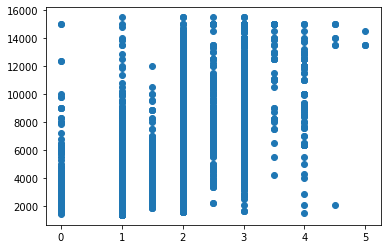

In [ ]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
# Theory: predict price based on whether accessible.
#plt.scatter(x='bedrooms', y='price', data=df)
plt.scatter(x='bathrooms', y='price', data=df)
#plt.scatter(x='inaccessible', y='price', data=df)
#plt.scatter(x='Outdoor_perks', y='price', data=df)
df.info()
#sns.regplot(x='bedrooms', y='price', data=df, fit_reg=True)
#df['wheelchair_access'].value_counts()
#df['inaccessible'].sort_values(ascending=True)


# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
target = 'price'

#X = df.select_dtypes('number').drop(columns=target)
# is the same as saying...
X = df.drop(columns=target)
y = df[target]

print(f'Feature matrix (X) shape: {X.shape}\nTarget vector (y) shape: {y.shape}')
# show target (price) is missing
X.index

Feature matrix (X) shape: (47259, 32)
Target vector (y) shape: (47259,)


DatetimeIndex(['2016-06-24 07:54:24', '2016-06-12 12:19:27',
               '2016-04-17 03:26:41', '2016-04-18 02:22:02',
               '2016-04-28 01:32:41', '2016-04-19 04:24:47',
               '2016-04-27 03:19:56', '2016-04-13 06:01:42',
               '2016-04-20 02:36:35', '2016-04-02 02:58:15',
               ...
               '2016-04-07 02:29:00', '2016-04-02 03:17:03',
               '2016-04-14 03:39:42', '2016-04-11 03:29:05',
               '2016-04-22 15:44:11', '2016-06-02 05:41:05',
               '2016-04-04 18:22:34', '2016-04-16 02:13:40',
               '2016-04-08 02:13:33', '2016-04-12 02:48:07'],
              dtype='datetime64[ns]', name='created', length=47259, freq=None)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
# X_train, y_train = ..., ...
# X_test, y_test = ..., ...
#df=df.sort_index()

#X_train, y_train = X.loc['2016-04-01' : '2016-05-31'], y.loc['2016-04-01' : '2016-05-31']
#X_test, y_test = X.loc['2016-06-01' : '2016-06-30'], y.loc['2016-06-01' : '2016-06-30']

# Creating the cutoff for training and test data sets

cutoff = '2016-06-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# can be shorter with...
#cutoff = X.index <'2016-06-01'

# Creating the training data set
#X_train, y_train = X.loc[cutoff], y.loc[cutoff]

# Creating the test data set
#X_test, y_test = X.loc[~cutoff], y.loc[~cutoff]


X_train.head()


,bathrooms,bedrooms,latitude,longitude,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,petBias,inaccessible,number_of_perks,number_of_beds_and_baths
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2.0
2016-04-18 02:22:02,1.0,1,40.7539,-73.9677,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2.0
2016-04-28 01:32:41,1.0,4,40.8241,-73.9493,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5.0
2016-04-19 04:24:47,2.0,4,40.7429,-74.0028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.0
2016-04-27 03:19:56,1.0,2,40.8012,-73.9660,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3.0


# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred) 

print('Baseline MAE:', baseline_mae)
print('Mean Apartment rent', y_train.mean())

Baseline MAE: 1202.4362220470398
Mean Apartment rent 3573.240188281123


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [ ]:
#In two steps...
#y_pred_train = model.predict(X_train)
#y_pred_test = model.predict(X_test)
##NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
#training_mae = mean_absolute_error(y_pred_train,y_train)
#test_mae = mean_absolute_error(y_pred_test,y_test)

#In one...
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.4038540791548
Test MAE: 701.4105774909184


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = model.score(X_train,y_train)
test_r2 = model.score(X_test,y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6192421458225952
Test MAE: 0.6263726149800508


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [ ]:
# Lets look at the coefficients and what they are associated with
feature_importance = abs(pd.Series(model.coef_, index = X_train.columns)).sort_values()
feature_importance.head()


number_of_perks      27.187500
dishwasher           29.743381
wheelchair_access    30.675781
swimming_pool        30.967773
garden_patio         71.931641
dtype: float64

In [ ]:
feature_importance = abs(pd.Series(model.coef_, index = X_train.columns)).sort_values()
feature_importance.head()

number_of_perks      27.187500
dishwasher           29.743381
wheelchair_access    30.675781
swimming_pool        30.967773
garden_patio         71.931641
dtype: float64

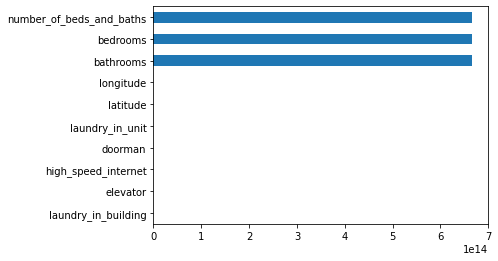

In [ ]:
feature_importance.tail(10).plot(kind = 'barh')
plt.show()

In [ ]:
feature_importance = abs(pd.Series(model.coef_, index=X_train.columns)).sort_values(key=abs).tail(10)
feature_importance.head()

laundry_in_building    282.940013
elevator               299.212218
high_speed_internet    362.820312
doorman                450.875771
laundry_in_unit        470.463549
dtype: float64

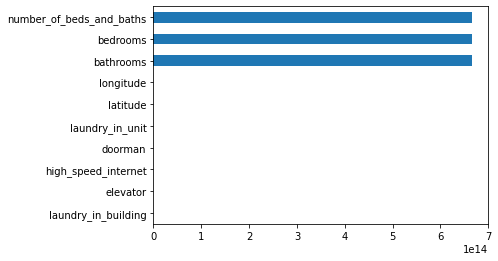

In [ ]:
feature_importance = abs(pd.Series(model.coef_, index=X_train.columns)).sort_values(key=abs).tail(10)
feature_importance.head()

feature_importance.tail(10).plot(kind = 'barh')
plt.show()